# Books Sale Data

**This Data will be about Analyzing Sales, Ratings, Genres and More!**

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [288]:
df = pd.read_csv(R"C:\Users\Jordan\Desktop\Data Science Folders\First Project\Books_Data_Clean.csv")

So here is the data I'm working with right now, there is a lot of information here so let's clean a little

In [18]:
df.drop('index', axis=1, inplace=True)
df.head()

,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


I took off the index row and took the 5 first data to not overload my notebooks with data and be able to see what I'm looking at

In [99]:
df['language_code'].unique()

array(['en-US', 'eng', nan, 'spa', 'en-GB', 'fre', 'en-CA', 'nl', 'ara'],
      dtype=object)

In [27]:
#I'm kinda wondering what the nan and nl standsfor so I'll try to look into this since I can understand:
#en-US = English US
#spa = spanish
#en-GB = English England
#fre = french
#en-CA = English Canada
#ara = Arabic

In [97]:
df1 = df[df['language_code'] == 'nan']

In [96]:
df2 = df[df['language_code'] == 'nl']

In [45]:
# the nan is unresponsive which is a good thing meanwhile nl could standsfor neatherlands

In [104]:
df['genre'].unique()

array(['genre fiction', 'fiction', 'nonfiction', 'children'], dtype=object)

In [107]:
df['units sold'].max

<bound method Series.max of 0       7000
1       6250
2       5500
3       5500
4       4750
        ... 
1065     106
1066     106
1067     106
1068     106
1069     106
Name: units sold, Length: 1070, dtype: int64>

###### Lets find the top 10 book that sold the most 

In [318]:
df['AuthorBookName'] = df['Book Name'] + "  from  " + df['Author']
mostsold1 = df.groupby('AuthorBookName')['units sold'].sum().nlargest(10).reset_index()

##### Visualization of my data 

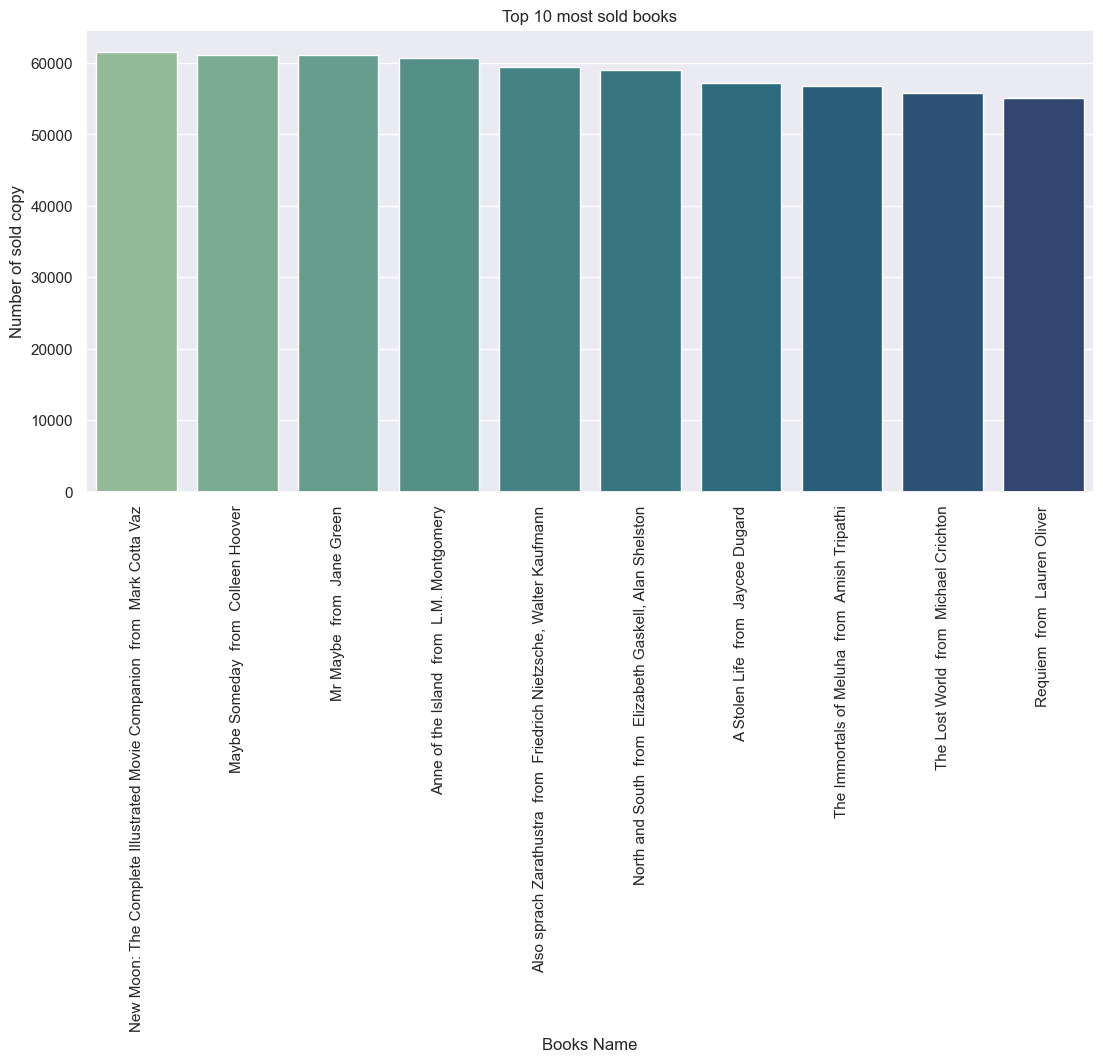

In [131]:
fig = (13,6)
fig, ax = plt.subplots(figsize=fig)
plt.xticks(rotation='vertical')
plt.gca().ticklabel_format(axis='y', style='plain')
ax = sns.barplot(mostsold1, x="AuthorBookName", y="units sold", estimator=sum, errorbar=None, palette="crest")

ax.set_title('Top 10 most sold books')
ax.set_xlabel('Books Name')
ax.set_ylabel('Number of sold copy');

##### The Author that sold the most book in general

In [144]:
authorsold = df.groupby('Author')['units sold'].sum().nlargest(10)
authorsold1 = authorsold.reset_index()

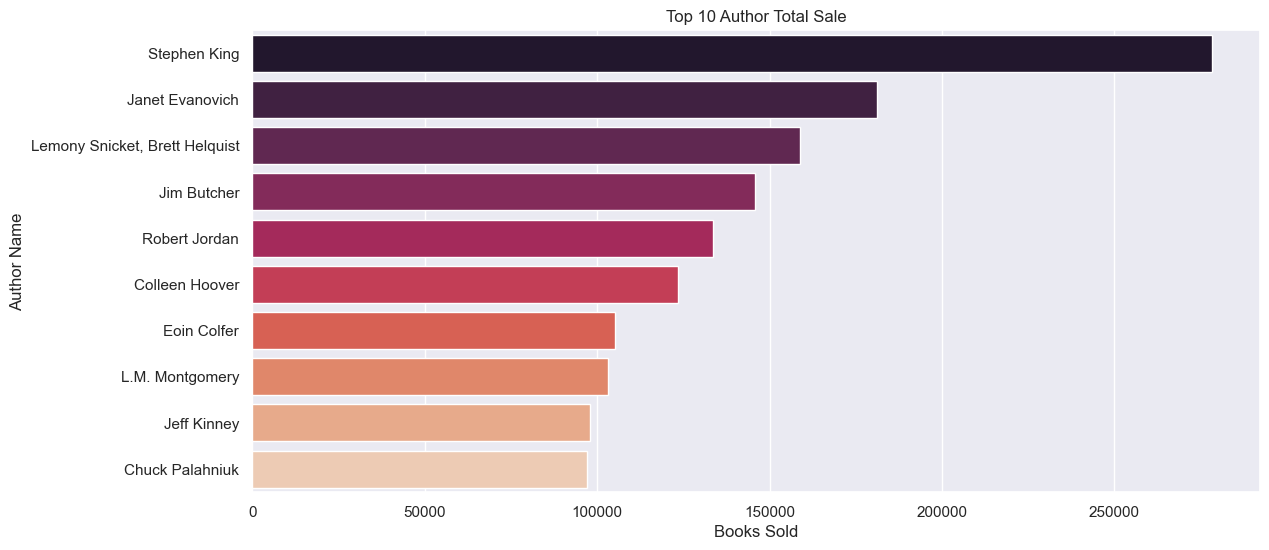

In [227]:

fig = (13,6)
fig, ax = plt.subplots(figsize=fig)
plt.xticks(rotation='horizontal')
plt.gca().ticklabel_format(axis='y', style='plain')
ax = sns.barplot(authorsold1, x="units sold", y="Author", estimator=sum, errorbar=None, palette = 'rocket')
ax.set_title('Top 10 Author Total Sale')
ax.set_xlabel('Books Sold')
ax.set_ylabel('Author Name');


##### Comparing top 10 books gross sales and publisher revenue

In [314]:
#I confirmed that gross sales is the total of units sold and sale price 
booksale = df.groupby('Book Name')['gross sales'].sum().nlargest(10).reset_index()
publisherrevenue = df.groupby('Book Name')['publisher revenue'].sum().nlargest(10).reset_index()
pbs = booksale.join(publisherrevenue.drop('Book Name',axis=1))


Text(0, 0.5, 'Total Revenue')

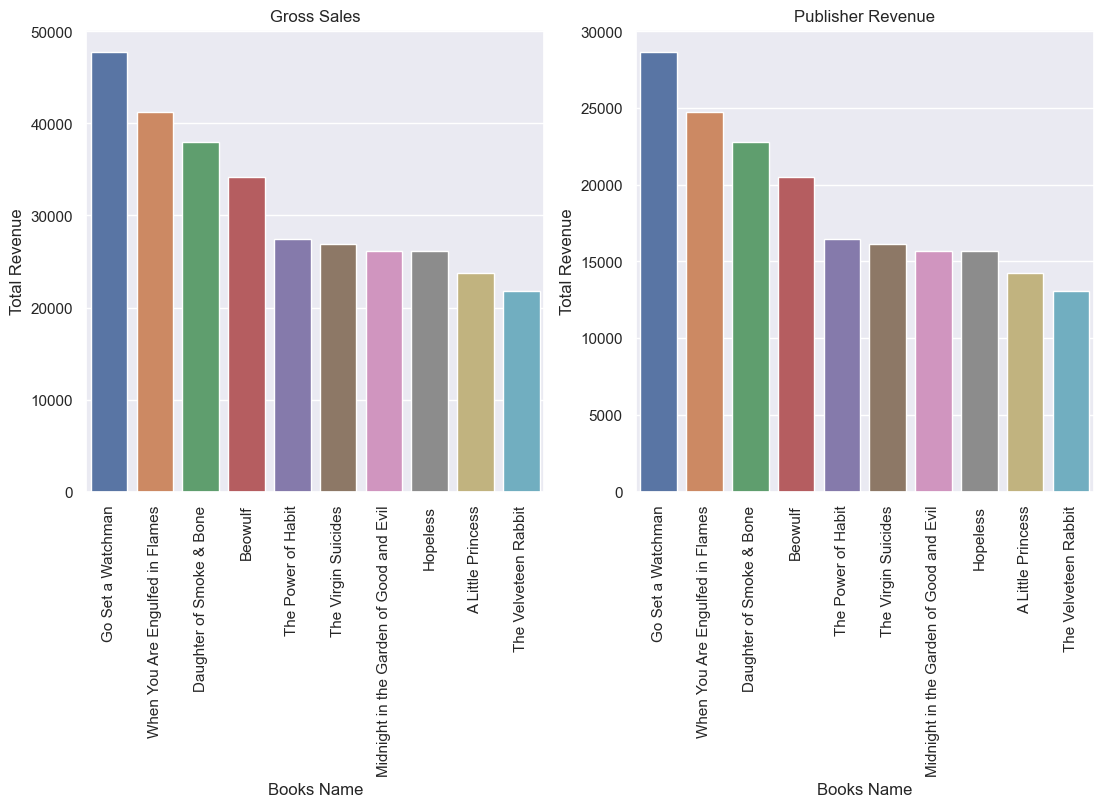

In [308]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 6)) 
sns.barplot(booksale, x="Book Name", y="gross sales", estimator=sum, errorbar=None, ax=ax1)
ax1.tick_params(axis='x', rotation=90)
ax1.set_title('Gross Sales')
ax1.set_xlabel('Books Name')
ax1.set_ylabel('Total Revenue')
sns.barplot(publisherrevenue, x="Book Name", y="publisher revenue", estimator= sum, errorbar=None,ax=ax2)
ax2.tick_params(axis='x', rotation=90)
ax2.set_title('Publisher Revenue')
ax2.set_xlabel('Books Name')
ax2.set_ylabel('Total Revenue')


##### Top 10 books revenue for the Author

In [319]:
df['Author revenue'] = df['gross sales'] - df['publisher revenue']
authorrevenue = df.groupby('AuthorBookName')['Author revenue'].sum().nlargest(10).reset_index()

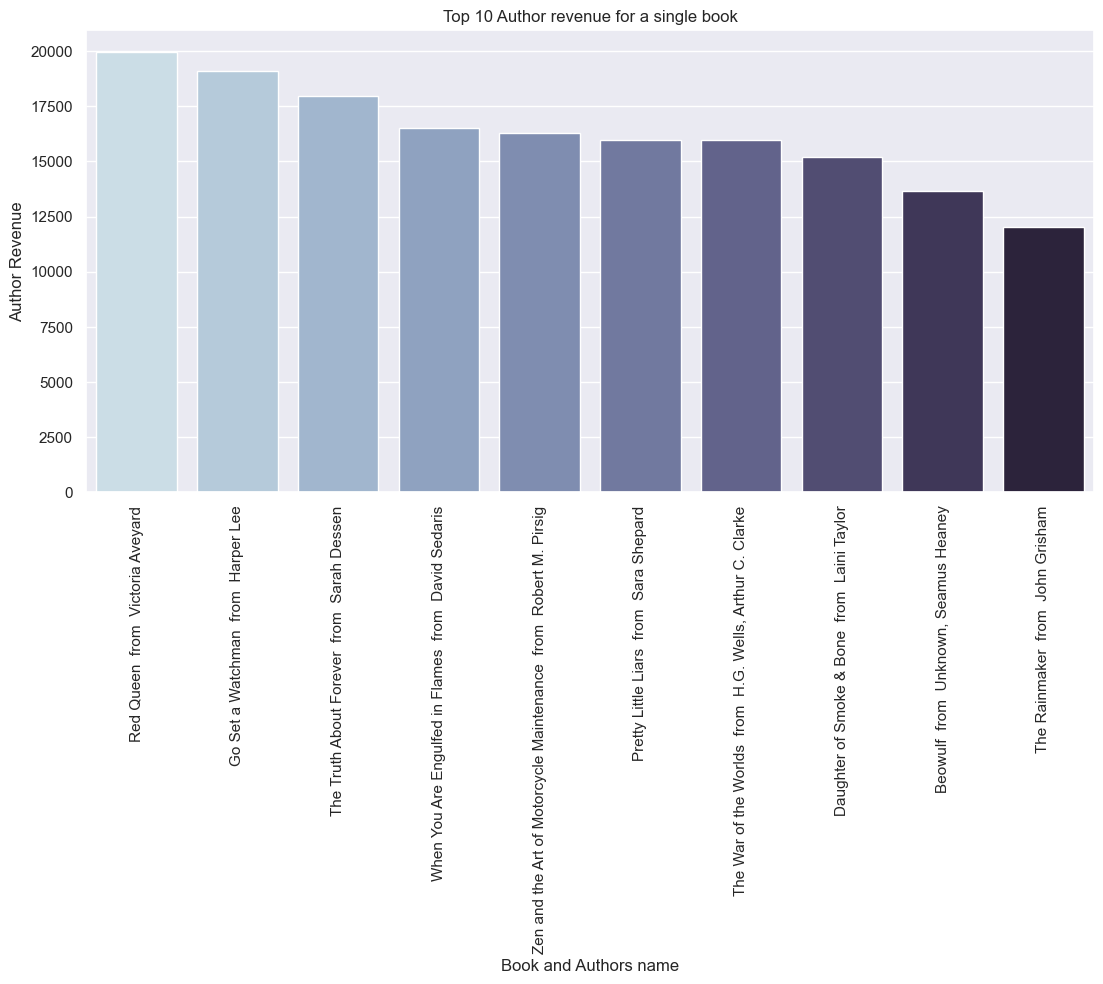

In [325]:
fig = (13,6)
fig, ax = plt.subplots(figsize=fig)
plt.xticks(rotation='vertical')
plt.gca().ticklabel_format(axis='y', style='plain')
ax = sns.barplot(authorrevenue, x="AuthorBookName", y="Author revenue", estimator=sum, errorbar=None, palette = "ch:s=.25,rot=-.25")
ax.set_title('Top 10 Author revenue for a single book')
ax.set_xlabel('Book and Authors name')
ax.set_ylabel('Author Revenue');

##### Top 10 rating books

In [353]:
avg_rating = df.groupby('Book Name')['Book_average_rating']
avg_rate = avg_rating.mean().nlargest(10).reset_index()

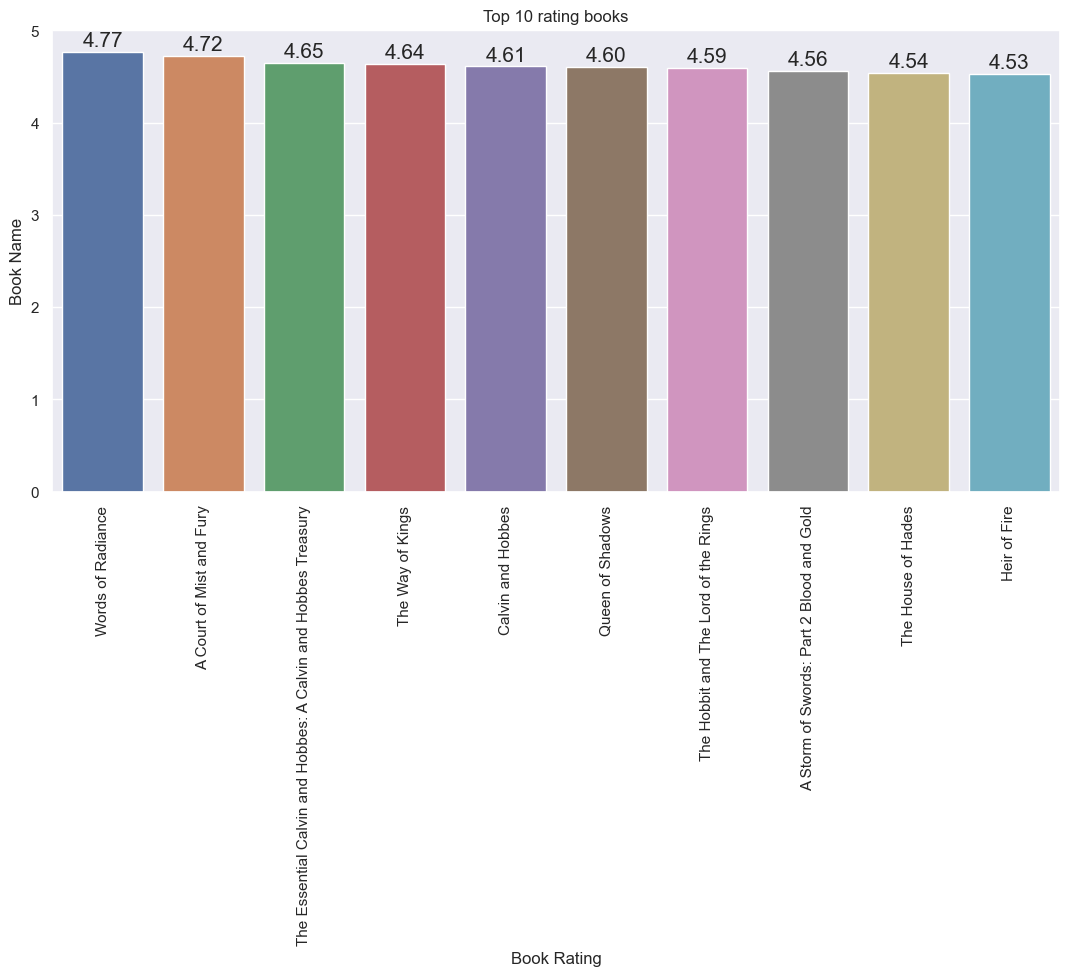

In [362]:
fig = (13,6)
fig, ax= plt.subplots(figsize=fig)
plt.xticks(rotation='vertical')
ax = sns.barplot(avg_rate, x= "Book Name", y= "Book_average_rating")
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
ax.set_title('Top 10 rating books')
ax.set_xlabel('Book Rating')
ax.set_ylabel('Book Name');